In [1]:
# Import required libraries
#%matplotlib inline
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from pytrends.request import TrendReq


In [14]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Setting up the routine
kw_list = ["how to breakup"]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
# Getting related queries
related_queries_dict = pytrends.related_queries()
print(related_queries_dict)

{'how to breakup': {'top':                                           query  value
0                       how to get over breakup    100
1                     how to get over a breakup     95
2                                      break up     36
3                               how to break up     36
4                             how to do breakup     32
5                      how to deal with breakup     29
6                    how to deal with a breakup     25
7                                how to move on     17
8                   how to breakup with someone     15
9                 how to breakup with boyfriend     14
10                 how long to get over breakup     13
11               how long to get over a breakup     11
12                               breakup quotes     11
13               how to breakup with girlfriend     10
14                 how to move on after breakup     10
15                      how to overcome breakup      9
16                                   d

In [4]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Updating request with manually selected related query
kw_list = ["how to breakup", "how to cope with breakup"]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Interest Over Time
trends = pytrends.interest_over_time()
trendsTime = pytrends.get_historical_interest(
    kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0,
    year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='',
    sleep=0
)

,how to breakup,how to cope with breakup,isPartial,Total
date,,,,
2018-01-01 00:00:00,54,0,False,54
2018-01-01 01:00:00,71,1,False,72
2018-01-01 02:00:00,60,2,False,62
2018-01-01 03:00:00,64,0,False,64
2018-01-01 04:00:00,49,0,False,49


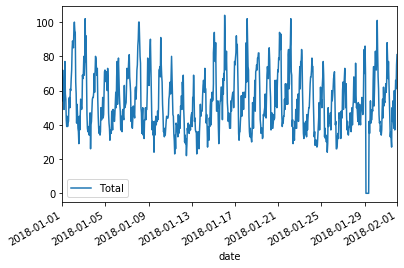

In [5]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Agreggating columns
trendsTime["Total"] = trendsTime["how to breakup"] + trendsTime["how to cope with breakup"]
trendsTime.plot(y=["Total"])
trendsTime.head()

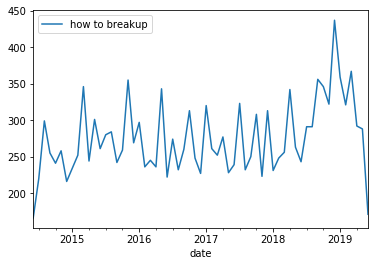

In [6]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Interest by Month
resample = trends.resample('M').sum()
resample.plot(y=["how to breakup"])


[]

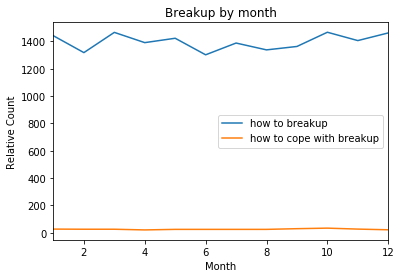

In [7]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Interest by Different Timescales
reshapedByMonth = trends.groupby([trends.index.month], as_index=True).sum()
ax = reshapedByMonth.plot(title='Breakup by month')
ax.set_xlabel("Month")
ax.set_ylabel("Relative Count")
plt.plot()


[]

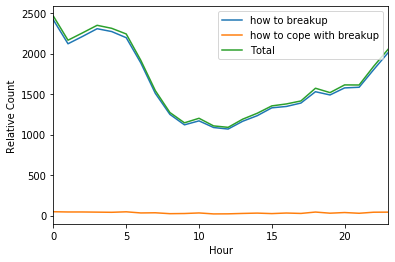

In [8]:
reshapedByArbitrary = trendsTime.groupby([trendsTime.index.hour], as_index=True).sum()
ax = reshapedByArbitrary.plot()
ax.set_xlabel("Hour")
ax.set_ylabel("Relative Count")
plt.plot()
#ax.get_figure().savefig('break.png',dpi=500)



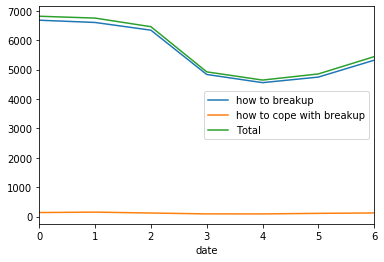

In [9]:
reshapedByArbitrary = trendsTime.groupby([trendsTime.index.dayofweek], as_index=True).sum()
reshapedByArbitrary.plot()

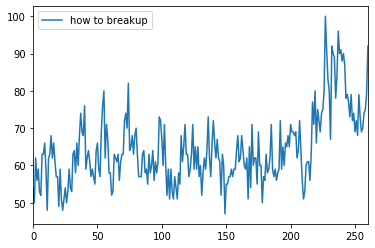

In [12]:
############################################################################
# Adding the index as a column
trends.reset_index(level=0, inplace=True)
trends.head()
trends["date"] = pd.to_datetime(trends["date"])
trends.groupby([trends.date.dt.year, trends.date.dt.month]).agg('count')
trends.plot(y =['how to breakup'])
